In [41]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
got_dataset = pd.read_csv('Dataset/character-predictions.csv')

In [7]:
got_dataset.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [8]:
got_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [11]:
nans = got_dataset.isna().sum() # contando a quantidade de valores nulos
nans[nans > 0]

title            1008
culture          1269
dateOfBirth      1513
DateoFdeath      1502
mother           1925
father           1920
heir             1923
house             427
spouse           1670
isAliveMother    1925
isAliveFather    1920
isAliveHeir      1923
isAliveSpouse    1670
age              1513
dtype: int64

In [12]:
# conhecendo o DatSet - Idade com problema
got_dataset.describe()

,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,...,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.745632,0.687050,0.634470,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,...,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,...,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# analisando dados nulos
print(got_dataset['age'].mean()) # possivel erro no dataset (media negativo para idade ?)

-1293.5635103926097


In [16]:
# realiando uma maior analise do dataset
print(got_dataset['name'][got_dataset['age'] < 0])
print(got_dataset['age'][got_dataset['age'] < 0])

1684    Doreah
1868    Rhaego
Name: name, dtype: object
1684   -277980.0
1868   -298001.0
Name: age, dtype: float64


In [18]:
# substituindo os valores nulos na idade negativa do dataset
got_dataset.loc[1684, 'age'] = 25.0
got_dataset.loc[1868, 'age'] = 0.0

# verificando novamente a media da idade
print(got_dataset['age'].mean())

36.70438799076212


In [21]:
# Tratando dados Nulos
got_dataset['age'].fillna(got_dataset['age'].mean(), inplace = True) # substituindo os valores nulos pela media do atributo
got_dataset['culture'].fillna('', inplace = True) # preenchendo os valores nulos da coluna cultura com string nula
got_dataset.fillna(value = -1, inplace = True) # preenchendo os demais valores nulos com -1

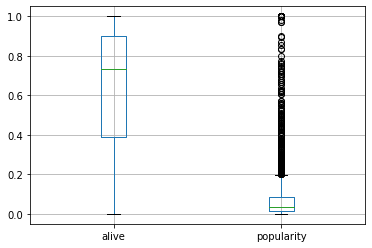

In [24]:
# realizando o boxplot de algumas variaveis
got_dataset.boxplot(['alive', 'popularity'])

In [27]:
# retirando algumas colunas do dataset
drop = ['S.No', 'pred', 'alive', 'plod', 'name', 'isAlive', 'DateoFdeath']
got_dataset.drop(drop, inplace = True, axis = 1)

# salvando copia do dataset para aplicar o hotenconder
got_dataset2 = got_dataset.copy(deep = True)

In [29]:
# Trabalhando dados Categoricos

# transformando dados categoricos em one-hot-encoder
got_dataset = pd.get_dummies(got_dataset)

In [32]:
# separando o dataset entre entradas e saidas
x = got_dataset.iloc[:,1:]
y = got_dataset.iloc[:,0]

In [36]:
# Iniciando a construção do pipeline do algoritmo

# separando os dados para a aplicação do modelo de validação cruzada
# divide o dataset entre 5 diferentes grupos 
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [38]:
print(kfold.get_n_splits)

<bound method _BaseKFold.get_n_splits of KFold(n_splits=5, random_state=42, shuffle=True)>


In [39]:
# construindo os modelos de classificação
modelos = [LogisticRegression(solver = 'liblinear'),
           RandomForestClassifier(n_estimators = 400, random_state = 42),
           DecisionTreeClassifier(random_state = 42),
           SVC(kernel = 'linear', gamma = 'scale', random_state = 42),
           KNeighborsClassifier()]

In [42]:
# utilizando a validação cruzada
mean = []
std = []
for model in modelos:
    result = cross_val_score(model, x, y, cv = kfold, scoring = 'accuracy', n_jobs = -1)
    mean.append(result)
    std.append(result)

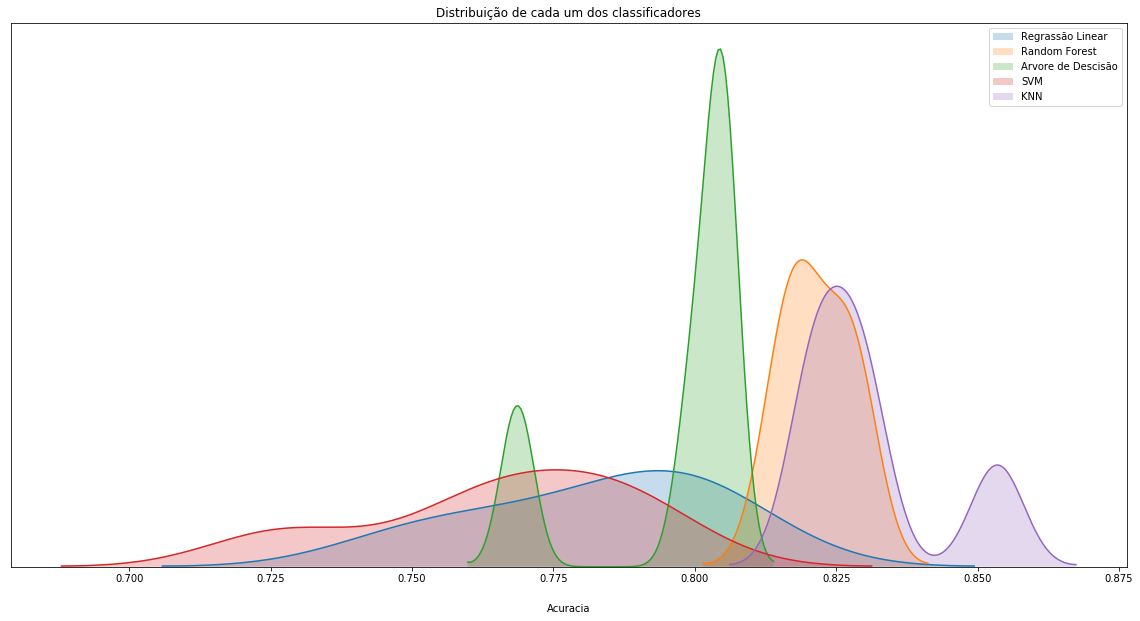

In [46]:
classificadores = ['Regrassão Linear', 'Random Forest', 'Arvore de Descisão', 'SVM', 'KNN']

plt.figure(figsize = (20,10))
for i in range(len(mean)):
    sns.distplot(mean[i], hist = False, kde_kws = {'shade' : True})

plt.title('Distribuição de cada um dos classificadores')
plt.legend(classificadores)
plt.xlabel('Acuracia', labelpad = 20)
plt.yticks([])
plt.show()

In [47]:
# Realizando a previsão dos classificadores

# dividindo o dataset entre dados de treinamrnto e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 42)

In [50]:
# escolhendo o SVM e RandomForest para realizar a previsão
svm_clf = SVC(C = 0.9, gamma = 0.1, kernel = 'linear', probability = True, random_state = 42)
rf_clf = RandomForestClassifier(n_estimators = 400, n_jobs = -1, random_state = 42)

# treina os modelos
svm_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [51]:
# obtem os probabilidades previstas
svm_prob = svm_clf.predict_proba(x_test)
rf_prob = rf_clf.predict_proba(x_test)

# valores reais
svm_preds = np.argmax(svm_prob, axis = 1)
rf_preds = np.argmax(rf_prob, axis = 1)

[Text(570.5454545454544, 0.5, 'Valor Real'), Text(0.5, 24.0, 'Previsão')]

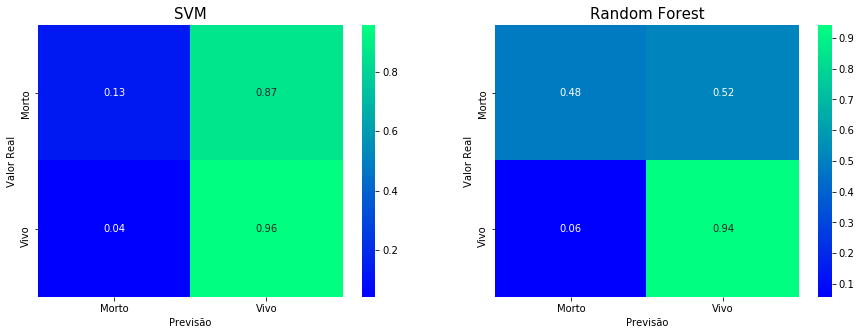

In [55]:
# analisando os modelos
cm = metrics.confusion_matrix(y_test, svm_preds)
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
cm2 = metrics.confusion_matrix(y_test, rf_preds)
cm2 = cm2.astype('float') / cm2.sum(axis = 1)[:, np.newaxis]

classes = ['Morto', 'Vivo']
f, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].set_title('SVM', fontsize = 15.)
sns.heatmap(pd.DataFrame(cm, index = classes, columns = classes),
            cmap = 'winter', annot = True, fmt = '.2f', ax = ax[0]).set(xlabel = 'Previsão', ylabel = 'Valor Real')

ax[1].set_title('Random Forest', fontsize = 15.)
sns.heatmap(pd.DataFrame(cm2, index = classes, columns = classes),
            cmap = 'winter', annot = True, fmt = '.2f', ax = ax[1]).set(xlabel = 'Previsão', ylabel = 'Valor Real')